# Empirical results

This notebook complements **Section V: Numerical results** of our paper [\[1\]][1]. Here, we implement the experiments that yield the numerical results we report in Section V.

Most of the Monte Carlo experiments that are programmed in this notebook take a substantial amount of time and resources (which we have duly annotated in each corresponding section). Consequently, if the flags present in each of the _computation_ sections are not modified, running the notebook will simply re-render the plots in the user-selected format, loading the results that were run on our computational set-up. To reproduce our results, simply change the corresponding flags to `True`.

## References

[\[1\]][1]: Pol del Aguila Pla, Lissy Pellaco, Satyam Dwivedi, Peter Händel and Joakim Jaldén, "Clock synchronization over networks: Identifiability of the sawtooth model", in IEEE Open Journal of Signal Processing, vol. 1, pp. 14-27, 2020, doi: 10.1109/OJSP.2020.2978762.

[1]: https://ieeexplore.ieee.org/document/9025036

## Index<a id="index"></a>

1. [Performance and CRLBs vs the sample size](#vs_sample_size) for given $\rho$, $f_\mathrm{d}$, $\phi_\mathcal{S}$ and SNRs
2. [Average performance vs the samples size](#vs_sample_size_randomized) for given SNRs
3. [Average performance vs the SNRs (in and out)](#vs_SNRs), for a given sample size
4. [Average performance vs the frequency difference $f_\mathrm{d}$](#vs_frequency) for a given sample size and SNR
5. [Average performance vs $\mathcal{S}$'s phase $\phi_\mathcal{S}$](#vs_phase) for a given sample size and SNR
6. [Exploration of the phenomenon of $\epsilon_+$](#epsilon) for $\sigma_v = 0$ and $f_\mathrm{d}$ a factor of co-primes using GGS

## Imports, configuration and flags

In [1]:
# Set to True to obtain interactive plots
interactive = False
%run Cramer-Rao_and_Monte-Carlo.ipynb
export_to_latex = False

## Performance and CRLBs vs the sample size for given $\rho$, $f_\mathrm{d}$, $\phi_\mathcal{S}$ and SNR
<a id="vs_sample_size"></a>
[Back to index](#index)

### Computations

In [2]:
run_MCs_vs_sample_size = False

def vs_sample_size( ):
    
    # Set physical parameters
    delta_0 = 5e-6; T_m = 1e-8; T_sampling = 1e-4; rho = 2; f_d = 73; phase_s = 3 * np.pi / 4;

    # Fix noise conditions
    SNR_out = 20; SNR_in = 40

    # Set grid configuration
    # Range of values
    min_nrof_samples = 5; max_nrof_samples = 5e3
    # Number of MC and CRLB points
    nrof_MC_points = 200; nrof_CRLB_points = 200

    # Set number of Monte Carlo repetitions (per grid point)
    nrof_MCs = 300

    # Derive related quantities
    # Get S's period
    T_s = T_m / ( 1 + T_m * f_d )

    # Get standard parameters
    alpha, beta, gamma, psi = to_standard_parameters( T_sampling, delta_0, rho, f_d, T_s, phase_s )
    # Inform user
    print( "The selected parameters correspond to \n\talpha = %E, beta = %E, gamma = %E and psi = %E."%( 
            alpha, beta, gamma, psi ) )

    # Create the grid according to specified parameters
    nrof_samples      = np.linspace( min_nrof_samples, max_nrof_samples, nrof_MC_points, dtype = np.int )
    nrof_samples_CRLB = np.linspace( min_nrof_samples, max_nrof_samples, nrof_CRLB_points               )

    # Get results
    # Run Montecarlo experiments 
    (f_d_error, phase_s_error, 
     rho_error, beta_error,
     gamma_error, alpha_error) = MC_experiments( nrof_samples = nrof_samples, rho = rho, f_d = f_d, 
                                                 phase_s = phase_s, SNR_out = SNR_out, SNR_in = SNR_in,
                                                 T_sampling = T_sampling, T_m = T_m, delta_0 = delta_0,
                                                 nrof_MCs = nrof_MCs )
    # Compute CRLBs
    CRLB_f_d, CRLB_rho, CRLB_phase_s = CRLB( f_d = f_d, phase_s = phase_s, SNR_out = SNR_out, SNR_in = SNR_in,
                                             nrof_samples = nrof_samples_CRLB, T_sampling = T_sampling, T_m = T_m )

    # Store results and delete variables
    np.savez_compressed( 'plots/vs_sample_size', delta_0 = delta_0, T_m = T_m, T_sampling = T_sampling, rho = rho,
                         f_d = f_d, phase_s = phase_s, SNR_out = SNR_out, SNR_in = SNR_in, nrof_MCs = nrof_MCs,
                         f_d_error = f_d_error, phase_s_error = phase_s_error, rho_error = rho_error, 
                         beta_error = beta_error, gamma_error = gamma_error, alpha_error = alpha_error,
                         CRLB_f_d = CRLB_f_d, CRLB_rho = CRLB_rho, CRLB_phase_s = CRLB_phase_s, 
                         nrof_samples = nrof_samples, nrof_samples_CRLB = nrof_samples_CRLB )
    print( "Stored results in plots/vs_sample_size.npz" )

if run_MCs_vs_sample_size:
    vs_sample_size( )

### Plotting

Plotting results for delta_0 = 5.000000E-06, T_m = 1.000000E-08, T_sampling = 1.000000E-04, rho = 2.000000, f_d = 73.000000, phase_s = 2.356194 SNR_out = 20.000000, SNR_in = 40.000000 with 300 Monte Carlo repetitions per sample size.


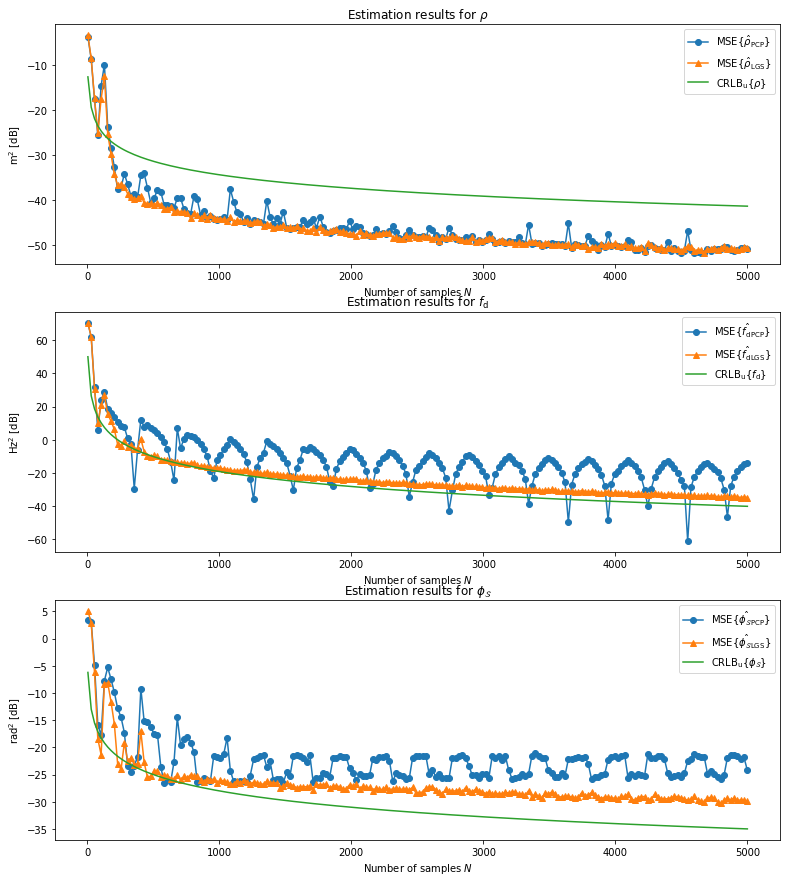

In [3]:
run_plots_vs_sample_size = True
def plots_vs_sample_size( ):
    # Load data from npz file
    ( delta_0, T_m, T_sampling, rho, f_d, phase_s, SNR_out, SNR_in, nrof_MCs, f_d_error, phase_s_error,
      rho_error, CRLB_f_d, CRLB_rho, CRLB_phase_s, nrof_samples, nrof_samples_CRLB ) = itemgetter( 'delta_0',
      'T_m', 'T_sampling', 'rho', 'f_d', 'phase_s', 'SNR_out', 'SNR_in', 'nrof_MCs', 'f_d_error', 
      'phase_s_error', 'rho_error', 'CRLB_f_d', 'CRLB_rho', 'CRLB_phase_s', 'nrof_samples', 'nrof_samples_CRLB'
      )( np.load( "plots/vs_sample_size.npz" ) )
    
    # Inform user
    print( "Plotting results for delta_0 = %E, T_m = %E, T_sampling = %E, rho = %f, f_d = %f, phase_s = %f"%( 
            delta_0, T_m, T_sampling, rho, f_d, phase_s ) + " SNR_out = %f, SNR_in = %f"%( SNR_out, SNR_in ) +
            " with %d Monte Carlo repetitions per sample size."%( nrof_MCs ) )

    # Set up figure
    plt.figure( figsize = [13,15] )
    # Set styles for PCP and LGS
    styles = ['o-', '^-' ]

    # Performance in estimating rho
    plt.subplot( 311 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{\rho}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{\rho}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( nrof_samples, rho_error[idx,:], styles[idx], label = labels[idx] )
    # Plot CRLB
    plt.plot( nrof_samples_CRLB, 10 * np.log10( CRLB_rho ), 
              label = r"$\mathrm{CRLB}_{\mathrm{u}}\lbrace \rho \rbrace$" )
    # Set axis labels, title and legend
    plt.xlabel( r"Number of samples $N$" )
    plt.ylabel( r"$\mathrm{m}^2\,\,[\mathrm{dB}]$" )
    plt.title(  r"Estimation results for $\rho$" )
    plt.legend( )

    # Performance in estimating f_d
    plt.subplot( 312 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{f_\mathrm{d}}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{f_\mathrm{d}}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( nrof_samples, f_d_error[idx,:], styles[idx], label = labels[idx] )
    # Plot CRLB
    plt.plot( nrof_samples_CRLB, 10*np.log10( CRLB_f_d ),
              label = r"$\mathrm{CRLB}_{\mathrm{u}}\lbrace f_\mathrm{d} \rbrace$" )
    # Set axis labels, title and legend
    plt.xlabel( r"Number of samples $N$" )
    plt.ylabel( r"$\mathrm{Hz}^2\,\,[\mathrm{dB}]$" )
    plt.title( r"Estimation results for $f_\mathrm{d}$" )
    plt.legend( )

    # Performance in estimating phase_s
    plt.subplot( 313 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{\phi_\mathcal{S}}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{\phi_\mathcal{S}}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( nrof_samples, phase_s_error[idx,:], styles[idx], label = labels[idx] )
    # Plot CRLB
    plt.plot( nrof_samples_CRLB, 10*np.log10( CRLB_phase_s ),
              label = r"$\mathrm{CRLB}_{\mathrm{u}}\lbrace \phi_\mathcal{S} \rbrace$" )
    # Set axis labels, title and legend
    plt.xlabel( r"Number of samples $N$" )
    plt.ylabel( r"$\mathrm{rad}^2\,\,[\mathrm{dB}]$" )
    plt.title( r"Estimation results for $\phi_\mathcal{S}$" )
    plt.legend( )

    if export_to_latex:
        tikz_save( "plots/vs_sample_size.tex" )

    if interactive:
        mpl_to_pltly( plt.gcf( ) )
    else:
        plt.show( )

if run_plots_vs_sample_size:
    plots_vs_sample_size( )

## Average performance vs the sample size for fixed SNRs
<a id="vs_sample_size_randomized"></a>
[Back to index](#index)

### Computations

In [4]:
run_MCs_vs_sample_size_randomized = False

def vs_sample_size_randomized( ):

    # Set physical parameters
    delta_0 = 5e-6; T_m = 1e-8; T_sampling = 1e-4

    # Fix noise conditions
    SNR_out = 20; SNR_in = 40

    # Set grid configuration
    min_nrof_samples = 5; max_nrof_samples = 0.5e4
    # Number of MC points
    nrof_MC_points = 200

    # Set MC configuration
    nrof_MCs = 2000

    # Create the grid of number of samples to evaluate
    nrof_samples = np.unique( 
                     np.logspace( 
                       np.log10( min_nrof_samples ), 
                       np.log10( max_nrof_samples ), 
                       nrof_MC_points, dtype = np.int ) )

    # Run Montecarlo experiments 
    (fd_error, phase_error,
     rho_error,beta_error, 
     gamma_error, alpha_error) = MC_experiments( nrof_samples = nrof_samples, SNR_out = SNR_out, 
                                                 SNR_in = SNR_in, T_sampling = T_sampling, T_m = T_m, 
                                                 delta_0 = delta_0, nrof_MCs = nrof_MCs, randomized = True )

    np.savez_compressed( 'plots/vs_sample_size_randomized', delta_0 = delta_0, T_m = T_m, T_sampling = T_sampling, 
                         SNR_out = SNR_out, SNR_in = SNR_in, nrof_MCs = nrof_MCs, nrof_samples = nrof_samples, 
                         fd_error = fd_error, phase_error = phase_error, rho_error = rho_error, 
                         beta_error = beta_error, gamma_error = gamma_error, alpha_error = alpha_error )
    print( "Stored results in plots/vs_sample_size_randomized.npz" )

if run_MCs_vs_sample_size_randomized:
    vs_sample_size_randomized( )

### Plotting

Plotting results for delta_0 = 5.000000E-06, T_m = 1.000000E-08, T_sampling = 1.000000E-04 SNR_out = 20.000000, SNR_in = 40.000000 with 2000 Monte Carlo repetitions per sample size. Every other physical parameter was randomized.


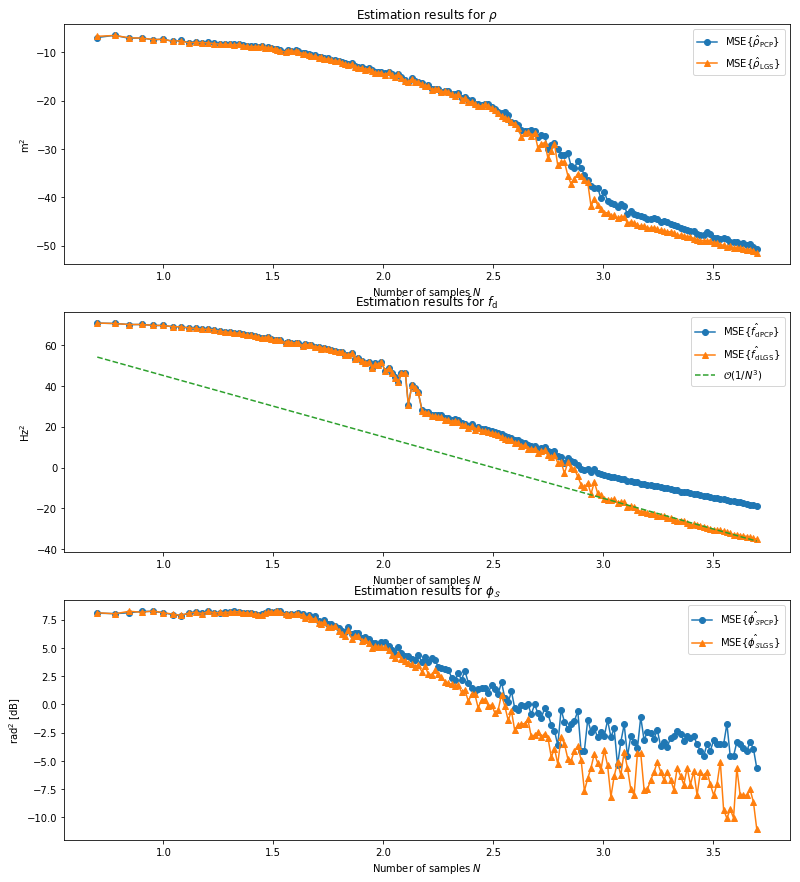

In [5]:
run_plots_vs_sample_size_randomized = True
def plots_vs_sample_size_randomized( ):
    
    # Load data from npz file
    ( delta_0, T_m, T_sampling, SNR_out, SNR_in, nrof_MCs, nrof_samples, 
      fd_error, phase_error, rho_error) = itemgetter( 'delta_0', 'T_m', 'T_sampling', 'SNR_out', 'SNR_in', 
      'nrof_MCs', 'nrof_samples', 'fd_error', 'phase_error', 'rho_error')( 
      np.load( "plots/vs_sample_size_randomized.npz" ) )

    print( "Plotting results for delta_0 = %E, T_m = %E, T_sampling = %E"%( delta_0, T_m, T_sampling ) + 
            " SNR_out = %f, SNR_in = %f"%( SNR_out, SNR_in ) + " with %d Monte Carlo repetitions per sample size."%( 
            nrof_MCs ) + " Every other physical parameter was randomized." )

    # Set up figure
    plt.figure( figsize = [13,15] )
    # Set styles for PCP, LGS and GGS
    styles = ['o-', '^-' ]
    # Performance in estimating rho
    plt.subplot( 311 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{\rho}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{\rho}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( np.log10(nrof_samples), rho_error[idx,:], styles[idx], label = labels[idx] )
    # Plot CRLB

    # Set axis labels, title and legend
    plt.xlabel( r"Number of samples $N$" )
    plt.ylabel( r"$\mathrm{m}^2~[\mathrm{dB}]$" )
    plt.title(  r"Estimation results for $\rho$" )
    plt.legend( )
    
    # Performance in estimating f_d
    plt.subplot( 312 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{f_\mathrm{d}}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{f_\mathrm{d}}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( np.log10(nrof_samples), fd_error[idx,:], styles[idx], label = labels[idx] )
    plt.plot( np.log10(nrof_samples), 75-30*np.log10(nrof_samples), '--', label = r"$\mathcal{O}(1/N^3)$" )

    # Set axis labels, title and legend
    plt.xlabel( r"Number of samples $N$" )
    plt.ylabel( r"$\mathrm{Hz}^2~[\mathrm{dB}]$" )
    plt.title( r"Estimation results for $f_\mathrm{d}$" )
    plt.legend( )
    # Performance in estimating phase_s
    plt.subplot( 313 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{\phi_\mathcal{S}}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{\phi_\mathcal{S}}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot(  np.log10(nrof_samples), phase_error[idx,:], styles[idx], label = labels[idx] )

    # Set axis labels, title and legend
    plt.xlabel( r"Number of samples $N$" )
    plt.ylabel( r"$\mathrm{rad}^2$ [dB]" )
    plt.title( r"Estimation results for $\phi_\mathcal{S}$" )
    plt.legend( )

    if export_to_latex:
        tikz_save( "plots/vs_sample_size_randomized.tex" )

    if interactive:
        mpl_to_pltly( plt.gcf( ) )
    else:
        plt.show( )

if run_plots_vs_sample_size_randomized:
    plots_vs_sample_size_randomized( )

## Average performance vs the SNRs (in and out), for a given sample size 
<a id="vs_SNRs"></a>
[Back to index](#index)

### Computations 

In [6]:
run_MCs_vs_SNRs = False

def vs_SNRs_randomized( ):
    
    # Set physical parameters
    delta_0 = 5e-6; T_m = 1e-8; T_sampling = 1e-4

    # Fix number of samples
    nrof_samples = 2000

    # Set grid configuration
    min_SNR_in = 0; max_SNR_in = 40
    min_SNR_out = 0; max_SNR_out = 30
    nrof_MC_points = 90

    # Set MC configuration
    nrof_MCs = 1000

    # Create the grid according to specified parameters (!this is a logarithmic grid of noise levels!)
    SNR_in       = np.linspace(  min_SNR_in,  max_SNR_in,    nrof_MC_points   )
    SNR_out      = np.linspace( min_SNR_out, max_SNR_out,    nrof_MC_points   )
    
    # Run for the grid of SNR_out
    # Run Montecarlo experiments 
    (f_d_error, phase_s_error, 
     rho_error, beta_error, 
     gamma_error, alpha_error) = MC_experiments( nrof_samples = nrof_samples, SNR_out = SNR_out, 
                                                 SNR_in = SNR_in[-1], T_sampling = T_sampling, 
                                                 T_m = T_m, delta_0 = delta_0, nrof_MCs = nrof_MCs,
                                                 randomized = True )

    np.savez_compressed( 'plots/vs_SNR_out_randomized', delta_0 = delta_0, T_m = T_m, T_sampling = T_sampling, 
                         nrof_samples = nrof_samples, SNR_out = SNR_out, SNR_in = SNR_in[-1], 
                         nrof_MCs = nrof_MCs, f_d_error = f_d_error, phase_s_error = phase_s_error,
                         rho_error = rho_error, beta_error = beta_error, gamma_error = gamma_error,
                         alpha_error = alpha_error )
    print( "Stored results in plots/vs_SNR_out_randomized.npz" )


    # Run for the grid of SNR_in
    # Run Montecarlo experiments 
    (f_d_error, phase_s_error, 
     rho_error, beta_error, 
     gamma_error, alpha_error) = MC_experiments( nrof_samples = nrof_samples, SNR_out = SNR_out[-1],
                                                 SNR_in = SNR_in, T_sampling = T_sampling, T_m = T_m,
                                                 delta_0 = delta_0, nrof_MCs = nrof_MCs, randomized = True )
    
    np.savez_compressed( 'plots/vs_SNR_in_randomized', delta_0 = delta_0, T_m = T_m, T_sampling = T_sampling, 
                         nrof_samples = nrof_samples, SNR_out = SNR_out[-1], SNR_in = SNR_in, 
                         nrof_MCs = nrof_MCs, f_d_error = f_d_error, phase_s_error = phase_s_error,
                         rho_error = rho_error, beta_error = beta_error, gamma_error = gamma_error,
                         alpha_error = alpha_error )
    print( "Stored results in plots/vs_SNR_in_randomized.npz" )

if run_MCs_vs_SNRs:
    vs_SNRs_randomized( )

### Plotting 

Plotting results for delta_0 = 5.000000E-06, T_m = 1.000000E-08, T_sampling = 1.000000E-04, and nrof_samples = 2000.000000 with 1000 Monte Carlo repetitions per SNR combination. All other physical parameters were randomized.


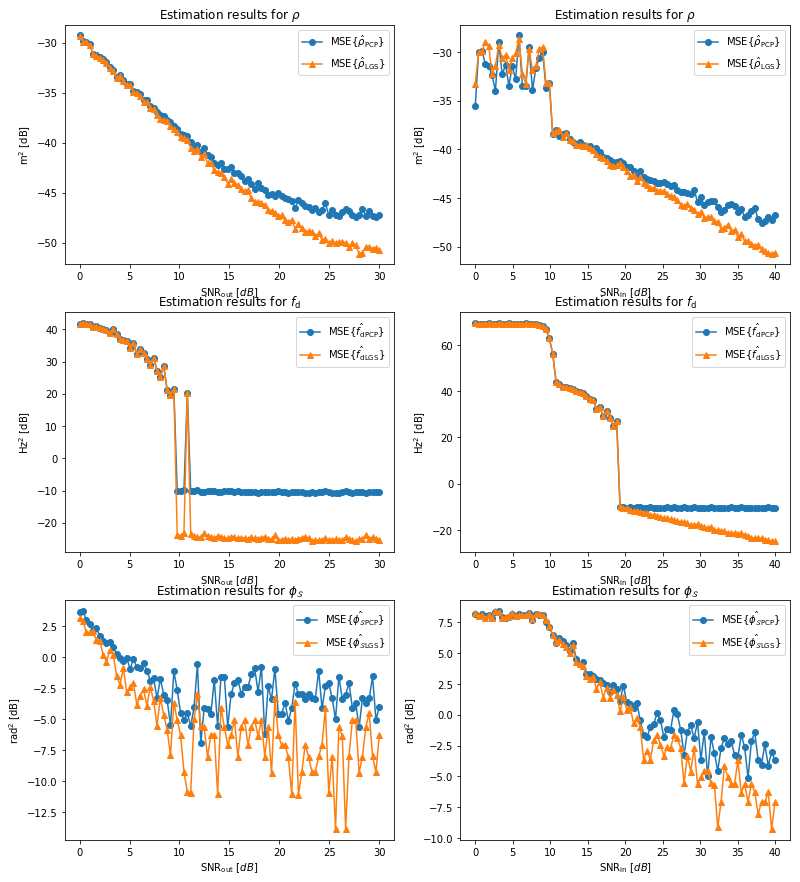

In [7]:
run_plots_vs_SNRs = True

def plots_vs_SNRs( ):
    # Load data from npz files
    ( delta_0, T_m, T_sampling, nrof_samples, SNR_out,  nrof_MCs, f_d_error_out, phase_s_error_out,
      rho_error_out ) = itemgetter( 'delta_0', 'T_m', 'T_sampling', 'nrof_samples', 'SNR_out', 'nrof_MCs',
      'f_d_error', 'phase_s_error', 'rho_error' )( np.load( "plots/vs_SNR_out_randomized.npz" ) )
    
    ( SNR_in, f_d_error_in, phase_s_error_in, rho_error_in ) = itemgetter( 'SNR_in', 'f_d_error', 
     'phase_s_error', 'rho_error' )( np.load( "plots/vs_SNR_in_randomized.npz" ) )

    print( "Plotting results for delta_0 = %E, T_m = %E, T_sampling = %E"%( delta_0, T_m, T_sampling ) + 
           ", and nrof_samples = %f "%( nrof_samples ) +
           "with %d Monte Carlo repetitions per SNR combination."%( nrof_MCs ) + 
           " All other physical parameters were randomized.")

    # Set up figure
    plt.figure( figsize = [13,15] )
    # Set styles for PCP, LGS and GGS
    styles = ['o-', '^-' ]

    # Performance in estimating rho
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{\rho}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{\rho}_{\mathrm{LGS}}\rbrace$"]
    # vs SNR_out
    plt.subplot( 321 )
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( SNR_out, rho_error_out[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$\mathrm{SNR}_\mathrm{out}\,\,[dB]$" )
    plt.ylabel( r"$\mathrm{m}^2\,\,[\mathrm{dB}]$" )
    plt.title(  r"Estimation results for $\rho$" )
    plt.legend( )
    # vs SNR_in
    plt.subplot( 322 )
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( SNR_in, rho_error_in[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$\mathrm{SNR}_\mathrm{in}\,\,[dB]$" )
    plt.ylabel( r"$\mathrm{m}^2\,\,[\mathrm{dB}]$" )
    plt.title(  r"Estimation results for $\rho$" )
    plt.legend( )


    # Performance in estimating f_d
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{f_\mathrm{d}}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{f_\mathrm{d}}_{\mathrm{LGS}}\rbrace$"]
    # vs SNR_out
    plt.subplot( 323 )
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( SNR_out, f_d_error_out[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$\mathrm{SNR}_\mathrm{out}\,\,[dB]$" )
    plt.ylabel( r"$\mathrm{Hz}^2\,\,[\mathrm{dB}]$" )
    plt.title(  r"Estimation results for $f_\mathrm{d}$" )
    plt.legend( )
    # vs SNR_in
    plt.subplot( 324 )
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( SNR_in, f_d_error_in[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$\mathrm{SNR}_\mathrm{in}\,\,[dB]$" )
    plt.ylabel( r"$\mathrm{Hz}^2\,\,[\mathrm{dB}]$" )
    plt.title(  r"Estimation results for $f_\mathrm{d}$" )
    plt.legend( )


    # Performance in estimating phase_s
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{\phi_\mathcal{S}}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{\phi_\mathcal{S}}_{\mathrm{LGS}}\rbrace$"]
    # vs SNR_out
    plt.subplot( 325 )
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( SNR_out, phase_s_error_out[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$\mathrm{SNR}_\mathrm{out}\,\,[dB]$" )
    plt.ylabel( r"$\mathrm{rad}^2$ [dB]" )
    plt.title( r"Estimation results for $\phi_\mathcal{S}$" )
    plt.legend( )
    # vs SNR_in
    plt.subplot( 326 )
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( SNR_in, phase_s_error_in[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$\mathrm{SNR}_\mathrm{in}\,\,[dB]$" )
    plt.ylabel( r"$\mathrm{rad}^2$ [dB]" )
    plt.title( r"Estimation results for $\phi_\mathcal{S}$" )
    plt.legend( )

    if export_to_latex:
        tikz_save( "plots/vs_SNRs_randomized.tex" )

    if interactive:
        mpl_to_pltly( plt.gcf( ) )
    else:
        plt.show( )

if run_plots_vs_SNRs:
    plots_vs_SNRs( )

## Average performance vs the frequency difference $f_\mathrm{d}$ for a given sample size and SNR 
<a id="vs_frequency"></a>
[Back to index](#index)

### Computations

In [8]:
run_MCs_vs_f_d_randomized = False

def vs_f_d_randomized( ):
    
    # Set physical parameters
    delta_0 = 5e-6; T_m = 1e-8; T_sampling = 1e-4;

    # Fix number of samples
    nrof_samples = 2000

    # Fix noise conditions
    SNR_out = 20; SNR_in = 40

    # Set grid configuration
    min_f_d = -200; max_f_d = 200
    nrof_MC_points = 200

    # Set MC configuration
    nrof_MCs = 300

    # Create the grid of f_ds to evaluate
    f_d = np.linspace( min_f_d, max_f_d, nrof_MC_points )

    # Run Montecarlo experiments 
    (f_d_error, phase_s_error, 
     rho_error, beta_error,
     gamma_error, alpha_error) = MC_experiments( nrof_samples = nrof_samples, f_d = f_d, 
                                                 SNR_out = SNR_out, SNR_in = SNR_in, T_sampling = T_sampling,
                                                 T_m = T_m, delta_0 = delta_0, nrof_MCs = nrof_MCs,
                                                 randomized = True )

    np.savez_compressed( 'plots/vs_f_d_randomized', delta_0 = delta_0, T_m = T_m, T_sampling = T_sampling,
                         nrof_samples = nrof_samples, SNR_out = SNR_out, SNR_in = SNR_in, nrof_MCs = nrof_MCs,
                         f_d = f_d, f_d_error = f_d_error, phase_s_error = phase_s_error,
                         rho_error = rho_error, beta_error = beta_error, gamma_error = gamma_error, 
                         alpha_error = alpha_error )
    print( "Stored results in plots/vs_f_d_randomized.npz" )

if run_MCs_vs_f_d_randomized:
    vs_f_d_randomized( )

### Plotting

Plotting results for delta_0 = 5.000000E-06, T_m = 1.000000E-08, T_sampling = 1.000000E-04nrof_samples = 2000, SNR_out = 20.000000, SNR_in = 40.000000 with 300 Monte Carlo repetitions per frequency value. Every other physical parameter was randomized.


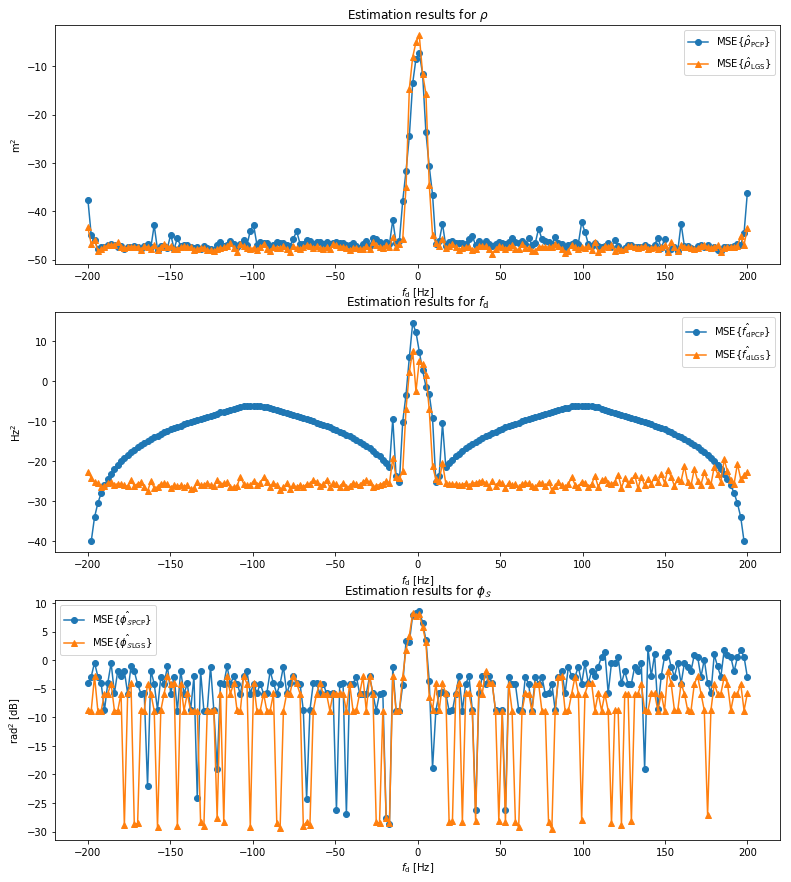

In [9]:
run_plots_vs_f_d_randomized = True

def plots_vs_f_d_randomized( ):

    # Load data from npz file
    ( delta_0, T_m, T_sampling, nrof_samples, SNR_out, SNR_in, nrof_MCs, f_d, f_d_error, phase_s_error,
      rho_error ) = itemgetter( 'delta_0', 'T_m', 'T_sampling', 'nrof_samples', 'SNR_out', 'SNR_in',
      'nrof_MCs', 'f_d', 'f_d_error', 'phase_s_error', 'rho_error' )( np.load( "plots/vs_f_d_randomized.npz" ) )

    # Inform user
    print( "Plotting results for delta_0 = %E, T_m = %E, T_sampling = %E"%( delta_0, T_m, T_sampling ) + 
           "nrof_samples = %d, SNR_out = %f, SNR_in = %f"%( nrof_samples, SNR_out, SNR_in ) + 
           " with %d Monte Carlo repetitions per frequency value."%( nrof_MCs ) + 
           " Every other physical parameter was randomized." )
    
    # Set up figure
    plt.figure( figsize = [13,15] )
    # Set styles for PCP and LGS
    styles = ['o-', '^-' ]

    # Performance in estimating rho
    plt.subplot( 311 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{\rho}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{\rho}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( f_d, rho_error[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$f_\mathrm{d}\,\,[\mathrm{Hz}]$" )
    plt.ylabel( r"$\mathrm{m}^2~[\mathrm{dB}]$" )
    plt.title(  r"Estimation results for $\rho$" )
    plt.legend( )


    # Performance in estimating f_d
    plt.subplot( 312 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{f_\mathrm{d}}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{f_\mathrm{d}}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( f_d, f_d_error[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$f_\mathrm{d}\,\,[\mathrm{Hz}]$" )
    plt.ylabel( r"$\mathrm{Hz}^2~[\mathrm{dB}]$" )
    plt.title( r"Estimation results for $f_\mathrm{d}$" )
    plt.legend( )


    # Performance in estimating phase_s
    plt.subplot( 313 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{\phi_\mathcal{S}}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{\phi_\mathcal{S}}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( f_d, phase_s_error[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$f_\mathrm{d}\,\,[\mathrm{Hz}]$" )
    plt.ylabel( r"$\mathrm{rad}^2$ [dB]" )
    plt.title( r"Estimation results for $\phi_\mathcal{S}$" )
    plt.legend( )

    if export_to_latex:
        tikz_save( "plots/vs_f_d_randomized.tex" )

    if interactive:
        mpl_to_pltly( plt.gcf( ) )
    else:
        plt.show( )

if run_plots_vs_f_d_randomized:
    plots_vs_f_d_randomized( )

## Average performance vs $\mathcal{S}$'s phase $\phi_\mathcal{S}$ for a given sample size and SNR 
<a id="vs_phase"> </a>
[Back to index](#index)

### Computations

In [10]:
run_MCs_vs_phase_s_randomized = False

def vs_phase_s_randomized( ):

    # Set physical parameters
    delta_0 = 5e-6; T_m = 1e-8; T_sampling = 1e-4

    # Fix number of samples
    nrof_samples = 2000

    # Fix noise conditions
    SNR_out = 20; SNR_in = 40

    # Set grid configuration
    min_phase_s = 0; max_phase_s = 2 * np.pi
    nrof_MC_points = 20
    
    # Set MC configuration
    nrof_MCs = 300

    # Create the grid of phases for S to test
    phase_s = np.linspace( min_phase_s,  max_phase_s, nrof_MC_points )

    # Run Montecarlo experiments 
    ( f_d_error, phase_s_error, 
      rho_error, beta_error,
      gamma_error, alpha_error) = MC_experiments( nrof_samples = nrof_samples, phase_s = phase_s, 
                                                  SNR_out = SNR_out, SNR_in = SNR_in,
                                                  T_sampling = T_sampling, T_m = T_m, delta_0 = delta_0,
                                                  nrof_MCs = nrof_MCs, randomized = True )
    
    np.savez_compressed( 'plots/vs_phase_s_randomized', delta_0 = delta_0, T_m = T_m, T_sampling = T_sampling, 
                         nrof_samples = nrof_samples, SNR_out = SNR_out, SNR_in = SNR_in, nrof_MCs = nrof_MCs,
                         phase_s = phase_s, f_d_error = f_d_error, phase_s_error = phase_s_error, 
                         rho_error = rho_error, beta_error = beta_error, gamma_error = gamma_error, 
                         alpha_error = alpha_error )
    print( "Stored results in plots/vs_phase_s_randomized.npz" )

if run_MCs_vs_phase_s_randomized:
    vs_phase_s_randomized( )

### Plotting

Plotting results for delta_0 = 5.000000E-06, T_m = 1.000000E-08, T_sampling = 1.000000E-04nrof_samples = 2000, SNR_out = 20.000000, SNR_in = 40.000000 with 300 Monte Carlo repetitions per frequency value. Every other physical parameter was randomized.


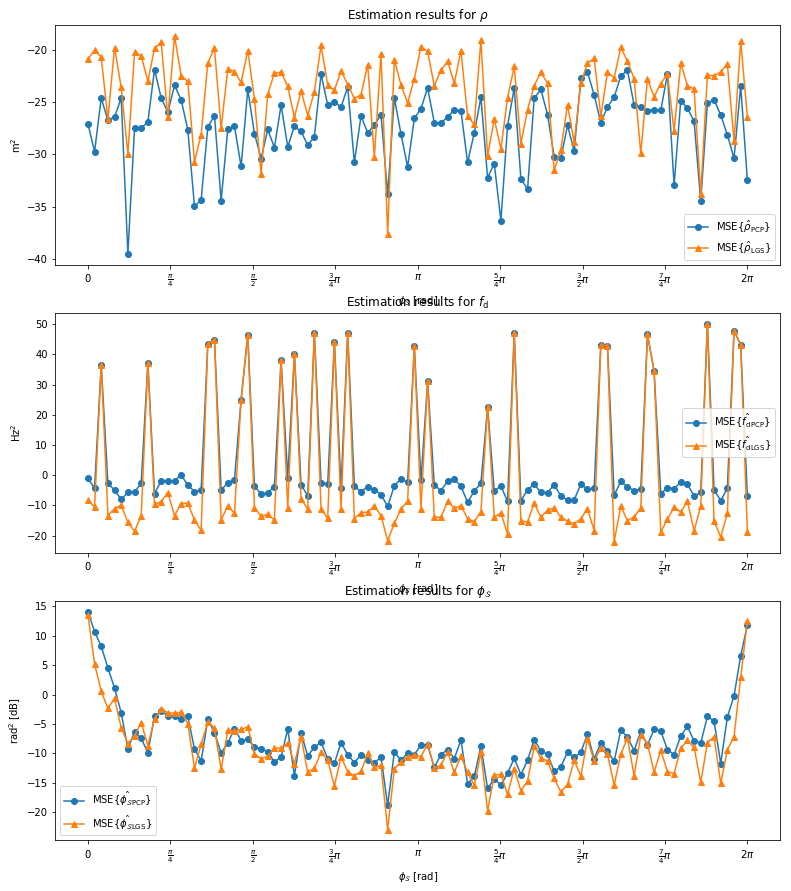

In [11]:
run_plots_vs_phase_s_randomized = True
def plots_vs_phase_s_randomized( ):

    # Load data from npz file
    ( delta_0, T_m, T_sampling, nrof_samples, SNR_out, SNR_in, nrof_MCs, phase_s, f_d_error, phase_s_error,
      rho_error ) = itemgetter( 'delta_0', 'T_m', 'T_sampling', 'nrof_samples', 'SNR_out', 'SNR_in',
      'nrof_MCs', 'phase_s', 'f_d_error', 'phase_s_error', 'rho_error' )( 
      np.load( "plots/vs_phase_s_randomized.npz" ) )

    # Inform user
    print( "Plotting results for delta_0 = %E, T_m = %E, T_sampling = %E"%( delta_0, T_m, T_sampling ) + 
           "nrof_samples = %d, SNR_out = %f, SNR_in = %f"%( nrof_samples, SNR_out, SNR_in ) + 
           " with %d Monte Carlo repetitions per frequency value."%( nrof_MCs ) + 
           " Every other physical parameter was randomized." )
    
    # Set up figure
    plt.figure( figsize = [13,15] )
    # Set styles for PCP and LGS
    styles = ['o-', '^-' ]

    # Performance in estimating rho
    plt.subplot( 311 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{\rho}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{\rho}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( phase_s, rho_error[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$\phi_\mathcal{S}\,\,[\mathrm{rad}]$" )
    plt.xticks( [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi], 
                [r"$0$", r"$\frac{\pi}{4}$",r"$\frac{\pi}{2}$",r"$\frac{3}{4}\pi$", r"$\pi$", 
                 r"$\frac{5}{4}\pi$", r"$\frac{3}{2}\pi$", r"$\frac{7}{4}\pi$", r"$2\pi$"] )
    plt.ylabel( r"$\mathrm{m}^2~[\mathrm{dB}]$" )
    plt.title(  r"Estimation results for $\rho$" )
    plt.legend( )


    # Performance in estimating f_d
    plt.subplot( 312 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{f_\mathrm{d}}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{f_\mathrm{d}}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( phase_s, f_d_error[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$\phi_\mathcal{S}\,\,[\mathrm{rad}]$" )
    plt.xticks( [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi], 
                [r"$0$", r"$\frac{\pi}{4}$",r"$\frac{\pi}{2}$",r"$\frac{3}{4}\pi$", r"$\pi$", 
                 r"$\frac{5}{4}\pi$", r"$\frac{3}{2}\pi$", r"$\frac{7}{4}\pi$", r"$2\pi$"] )
    plt.ylabel( r"$\mathrm{Hz}^2~[\mathrm{dB}]$" )
    plt.title( r"Estimation results for $f_\mathrm{d}$" )
    plt.legend( )


    # Performance in estimating phase_s
    plt.subplot( 313 )
    # Set up labels for MC results
    labels = [r"$\mathrm{MSE}\lbrace \hat{\phi_\mathcal{S}}_{\mathrm{PCP}}\rbrace$",
              r"$\mathrm{MSE}\lbrace \hat{\phi_\mathcal{S}}_{\mathrm{LGS}}\rbrace$"]
    # Plot MC results
    for idx in range( len( styles ) ):
        plt.plot( phase_s, phase_s_error[idx,:], styles[idx], label = labels[idx] )
    # Set axis labels, title and legend
    plt.xlabel( r"$\phi_\mathcal{S}\,\,[\mathrm{rad}]$" )
    plt.xticks( [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi], 
                [r"$0$", r"$\frac{\pi}{4}$",r"$\frac{\pi}{2}$",r"$\frac{3}{4}\pi$", r"$\pi$", 
                 r"$\frac{5}{4}\pi$", r"$\frac{3}{2}\pi$", r"$\frac{7}{4}\pi$", r"$2\pi$"] )
    plt.ylabel( r"$\mathrm{rad}^2$ [dB]" )
    plt.title( r"Estimation results for $\phi_\mathcal{S}$" )
    plt.legend( )

    if export_to_latex:
        tikz_save( "plots/vs_phase_s_randomized.tex" )

    if interactive:
        mpl_to_pltly( plt.gcf( ) )
    else:
        plt.show( )

if run_plots_vs_phase_s_randomized:
    plots_vs_phase_s_randomized( )


## Exploration of the phenomenon of $\epsilon_+$ for $\sigma_v = 0$ and $\beta$ a factor of co-primes (using GGS)
<a id="epsilon"> </a>
[Back to index](#index)

In Lemma 1 in our paper [\[1\]][1] we state that, if $\sigma_v=0$, i.e., there is no noise inside the $\mathrm{mod}_1$ non-linearity, positive changes in $\gamma$ below $\epsilon_+$ are indistinguishable in the data from the corresponding changes in $\alpha$ below $\psi\epsilon_+$. In the specific case in which $\beta = M/Q$ with $M$ and $Q$ co-primes, we argue that $\epsilon_+\not\rightarrow 0$ with $N\rightarrow +\infty$. In particular, because the signal is $Q$-periodic we have that for any sample size $N\geq Q$,

$$
\epsilon_+ = 1- \mathrm{max}_{n\in\lbrace0,1,\dots,Q-1\rbrace}\left[ \mathrm{mod}_1\left( \beta n + \gamma 
\right) \right]\,.
$$

Consequently, it is expected that after observing some number $k$ of periods of length $Q$, further samples do not lead to an improved performance in the estimation of $\alpha$ and $\gamma$.

In the experiment below, we set $\alpha = 1$, $\beta = \frac{1}{10}$, $\gamma = \frac{1}{2}$ and $\mathrm{SNR}_{\mathrm{out}} = 5~\mathrm{dB}$, assume that $\beta$ and $\gamma$ are known when trying to estimate $\gamma$ and $\alpha$ through a global grid-search procedure (GGS).

[1]:http://arxiv.org/abs/1906.08208

### Computations

In [12]:
run_GSS_for_epsilon_plus_phenomenon = False

if run_GSS_for_epsilon_plus_phenomenon == True:
# Set parameters for the frequency
    M = 1; Q = 10;
    if not gcd( M, Q ) == 1:
        print( "M and Q are not co-primes" )

    # Set parameters for the system
    # Frequency, amplitude, phase, offset and outer SNR
    beta = M / Q; psi = 1.; gamma = 0.5; alpha = 1.; SNR_out = 5.

    # Set parameters for the plot
    min_periods = .5; max_periods = 200; points_MC = 100; points_CRLB = 100;

    # Set noise stds 
    w_std = psi * 10.**( - SNR_out / 20. ); v_std = 0

    # Set the number of Monte Carlo repetitions
    nrof_MCs = 2000

    # Compute CRLBs and epsilon_+
    nrof_samples_CRLB = np.linspace( min_periods*Q, max_periods*Q, points_CRLB, dtype = np.float )
    # CRLBs
    CRLB_alpha = w_std**2 /  nrof_samples_CRLB
    CRLB_gamma = w_std**2 / (nrof_samples_CRLB * psi**2) 
    # epsilon_+
    epsilon =  1 - np.max( mod_one( beta * np.arange( Q ) + gamma ) )

    # Generate numbers of samples to try out
    nrof_samples_grid = np.linspace( nrof_samples_CRLB[0], max_periods*Q, points_MC, dtype = np.int )

    # Initialize variables to store the error
    alpha_error = np.zeros_like( nrof_samples_grid, dtype = np.float64 )
    gamma_error = np.zeros_like( nrof_samples_grid, dtype = np.float64 )

    # Inform user
    print( "Starting Montecarlo runs (%d per every number of samples), sit tight..."%( nrof_MCs ) )
    print( "N from %d to %d, in %d steps."%( nrof_samples_CRLB[0], max_periods*Q, points_MC ) )
    print( "N = ", end = '' )

    start = time.time( )
    # Loop for each number of samples
    for nrof_samples_idx in np.arange( nrof_samples_grid.size ): 

        # Initialize variables to compute MSE for a specific sample size
        a_error = 0.
        g_error = 0.
        # Inform user
        print( "%d"%( nrof_samples_grid[nrof_samples_idx] ), end = ', ' )
        # Loop through MC repetitions
        for repetition in np.arange( nrof_MCs ):
            # Generate signal
            y = generate_signal( nrof_samples = nrof_samples_grid[nrof_samples_idx], 
                                 beta = beta, gamma = gamma, alpha = alpha, 
                                 psi = psi, w_std = w_std, v_std = v_std )
            # Estimate parameters with GGS (known psi and beta)
            ggs_alpha, _, ggs_gamma = grid_search( y, psi_function = (lambda beta: psi), mode = 'global', 
                                                   interval_beta = [beta, beta], nrof_points = [1000, 1] )
            # Accumulate error
            a_error = a_error + (ggs_alpha - alpha)**2
            g_error = g_error + (ggs_gamma - gamma)**2

        # Store results of current sample size
        alpha_error[nrof_samples_idx] = 10. * ( np.log10( a_error ) - np.log10( nrof_MCs ) )
        gamma_error[nrof_samples_idx] = 10. * ( np.log10( g_error ) - np.log10( nrof_MCs ) )

    computation_time = time.time( ) - start
    print( "Finished in %d min, %f s."%( computation_time//60, (computation_time%(60)) ) )

    # Store results
    np.savez_compressed( 'plots/epsilon_phenomenon', nrof_samples_grid = nrof_samples_grid, alpha_error = alpha_error,
                         epsilon = epsilon, nrof_samples_CRLB = nrof_samples_CRLB, CRLB_alpha = CRLB_alpha,
                         CRLB_gamma = CRLB_gamma, gamma_error = gamma_error, export_to_latex = export_to_latex,
                         interactive = interactive, beta = beta, psi = psi, gamma = gamma, alpha = alpha,
                         SNR_out = SNR_out )
    print( "Stored results in plots/epsilon_phenomenon.npz" )
    

### Plotting

Plotting results for alpha = 1.000000, beta = 0.100000, gamma = 0.500000, psi = 1.000000, and SNR_w = 5.000000


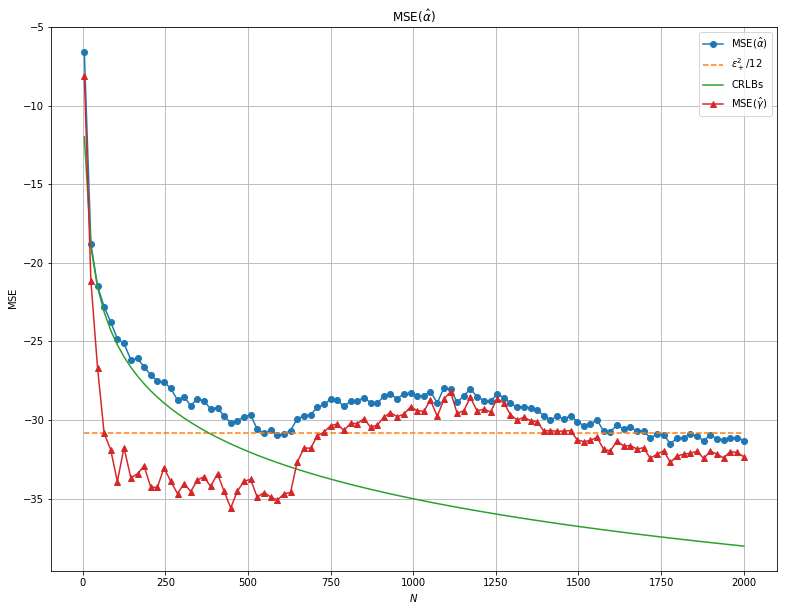

In [13]:

# Load data from npz file
( nrof_samples_grid, alpha_error, epsilon, nrof_samples_CRLB, CRLB_alpha, CRLB_gamma, gamma_error,
  beta, psi, gamma, alpha, SNR_out ) = itemgetter( 'nrof_samples_grid',
 'alpha_error', 'epsilon', 'nrof_samples_CRLB', 'CRLB_alpha', 'CRLB_gamma', 'gamma_error', 
 'beta', 'psi', 'gamma', 'alpha', 'SNR_out' )(
 np.load( "plots/epsilon_phenomenon.npz" ) )

print( "Plotting results for alpha = %f, beta = %f, gamma = %f, psi = %f, and SNR_w = %f"%( 
        alpha, beta, gamma, psi, SNR_out ) )

# Set up figure
plt.figure( figsize = [13,10] )
# Plot MSE for alpha
plt.plot( nrof_samples_grid, alpha_error, 'o-', label = r"$\mathrm{MSE}(\hat{\alpha})$" )
# Plot epsilon^2_+/12 as a straight line
plt.plot( nrof_samples_grid, 
          10 * np.log10( epsilon**2 / 12 ) * np.ones_like( nrof_samples_grid ), '--',
         label = r"$\epsilon^2_+ / 12$" )
# If the two parameters have different scales
if not np.abs( psi ) == 1:
    # Plot the CRLBs
    plt.plot( nrof_samples_CRLB, 10*np.log10( CRLB_alpha ), label = r"$\mathrm{CRLB}(\alpha)$" )
    plt.plot( nrof_samples_CRLB, 10*np.log10( CRLB_gamma ), label = r"$\mathrm{CRLB}(\gamma)$" )
    # Plot psi^2 epsilon^2_+/12 (scale of alpha)
    plt.plot( nrof_samples_grid, 
          10 * np.log10( (psi * epsilon)**2 / 12 ) * np.ones_like( nrof_samples_grid ), '--',
         label = r"$(\psi \epsilon)^2_+ / 12$" )
else:
    plt.plot( nrof_samples_CRLB, 10*np.log10( CRLB_alpha ), label = r"$\mathrm{CRLBs}$" )
# Plot MSE for gamma
plt.plot( nrof_samples_grid, gamma_error, '^-', label = r"$\mathrm{MSE}(\hat{\gamma})$" )
# Activate grid, set title, and configure labels and legend
plt.grid( True, which = 'both' )
plt.title( r"$\mathrm{MSE}(\hat{\alpha})~\mathrm{and}~\mathrm{MSE}(\hat{\gamma})~" + 
           r"\mathrm{ vs }~N\mathrm{,~with~}\sigma_v=0,\,\beta=M/Q$" )
plt.xlabel( r"$N$" )
plt.ylabel( r"$\mathrm{MSE}~[\mathrm{dB}]$")
plt.legend(  )

# Export to TikZ, if required
if export_to_latex:
    tikz_save( "plots/epsilon_phenomenon.tex" )

# Show interactive or static version, as required

if interactive:
    mpl_to_pltly( plt.gcf( ) )
else:
    plt.show( )
